In [10]:
from openai import OpenAI
client = OpenAI(
    api_key="sk-****"
)
OPENAI_API_KEY = "sk-****"

In [4]:
from IPython.display import display, Image, Audio

import cv2  # We're using OpenCV to read video, to install !pip install opencv-python
import base64
import time
import os
import requests


video = cv2.VideoCapture("dogs.mp4")

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

5702 frames read.


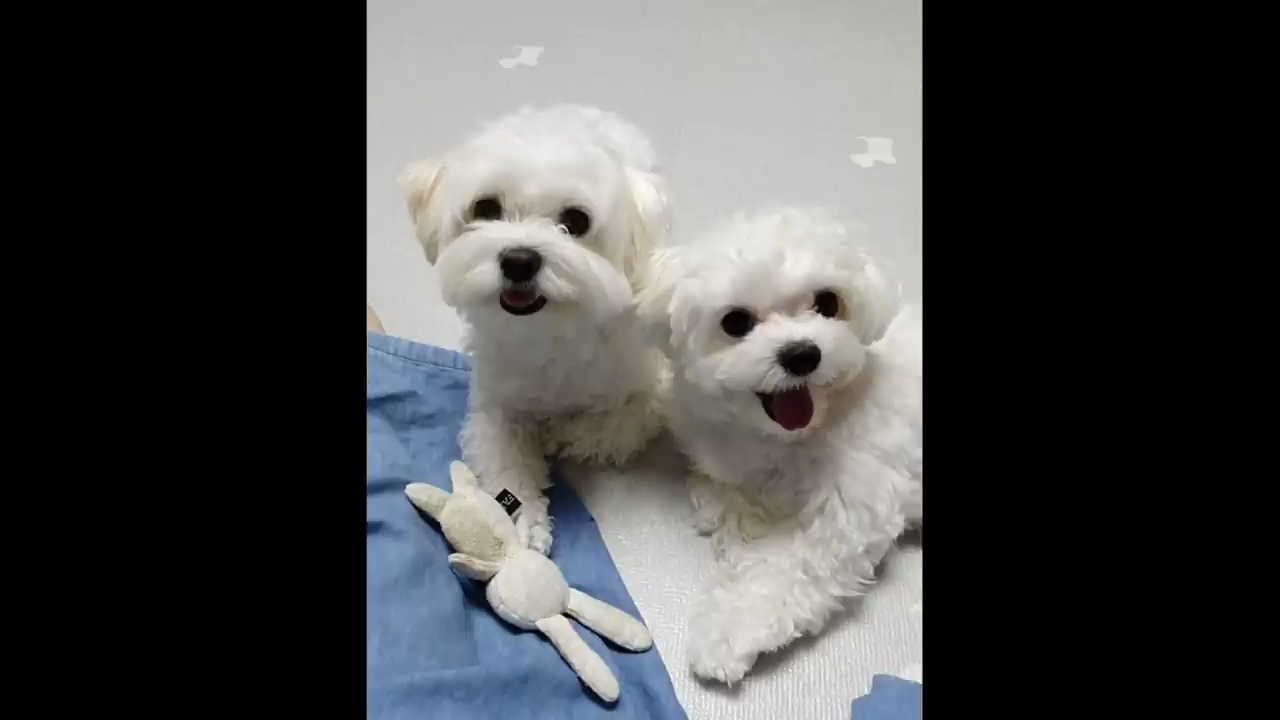

In [5]:
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)

In [13]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames from a video that I want to upload. Generate a compelling description that I can upload along with the video.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::50]),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 200,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

"🐾 Fluffy Furr-ends: A Day in the Life 🐶❤️ - Dive into the delightful world of these adorable fluffy friends! From their heartwarming playtime moments to their cute, curious expressions, this video captures the joy and boundless energy of our cherished canine companions. Watch them explore their surroundings, engage in playful antics, and shower us with the kind of love only a four-legged friend can give. Turn your day around with the cutest doggy adventures, sweet cuddles, and playful paws! Don't forget to like, share, and subscribe for more pawsome content! 🐾✨

(Multi-language subtitles available!)"


In [15]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames of a video. Create a short voiceover script in the style of David Attenborough. Only include the narration.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[60::120]),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 500,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

In the comfort of a human abode, here we find the domestic Canis lupus familiaris, more affectionately known as the dog. This particular variety, with its fluffy white coat and twinkling eyes, is a charming specimen indeed. Its day is spent in the pursuit of happiness - a toy to gnaw on, a loving glance from its human, or even the simple joy of a well-deserved snack.

Notice the way it bounds with effervescent energy, every fiber of its being vibrating with the sheer delight of existence. Whether it's wagging its tail in eager anticipation or tilting its head in endearing curiosity, each movement is an expression of pure, unbridled canine spirit.

And then, the play - a social engagement that rivals the complex rituals of the wild. Our domesticated friend engages in the ancient dance of hunt and chase, albeit with a soft toy. These mock battles, full of sound and harmless fury, are critical to the social development and mental well-being of this remarkable creature.

Ah, to be a dog in

In [16]:
response = requests.post(
    "https://api.openai.com/v1/audio/speech",
    headers={
        "Authorization": f"Bearer {OPENAI_API_KEY}",
    },
    json={
        "model": "tts-1-1106",
        "input": result.choices[0].message.content,
        "voice": "onyx",
    },
)

audio = b""
for chunk in response.iter_content(chunk_size=1024 * 1024):
    audio += chunk
Audio(audio)